# Individual Project - Financial Programming

In [1]:
#pip install BeautifulSoup4
#pip install selenium

# Section I. Project before the change in the webpage

***As I showed you in a class,before the changes in the webpage, this project was basicly finished. In 'Section I', I am including a functional scrapping designed for the previous webpage. In 'Section II', I am presenting a script relating to the new scope of the project. In order to see the previous outputs, do not run everything at once.*** 

In [4]:
# Libraries
from sklearn.model_selection   import train_test_split
from bokeh.plotting import figure, output_file, show
from sklearn.linear_model import LinearRegression
from pandas.plotting import autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from statsmodels.api import OLS
import matplotlib.pyplot as plt
from datetime import timedelta
import statsmodels.api as sm
from pylab import rcParams
from numpy import log
import pandas as pd
import itertools
import warnings
import datetime
import sys

# BeautifulSoap et al
from urllib.request import urlopen
from html.parser import HTMLParser
import bs4 as BeautifulSoup
import urllib.request
import requests
import lxml

## 1) Defining the date scope: 

***Determining dates of the report:***

In [52]:
list_d = []
inicio = datetime.datetime.strptime('20-10-2019', '%d-%m-%Y')
fin = datetime.datetime.strptime('25-10-2019', '%d-%m-%Y')
date_range = (inicio + datetime.timedelta(days=x) for x in range(0, (fin-inicio).days))

In [53]:
for x in date_range:
    list_d.append(x.strftime("%Y-%m-%d"))

In [55]:
list_links = []
for i in list_d:
    liga1 = 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/'+i+'/DE_LU'
    list_links.append(liga1)
    print(list_links)

['https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-20/DE_LU']
['https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-20/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-21/DE_LU']
['https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-20/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-21/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-22/DE_LU']
['https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-20/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-21/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-22/DE_LU', 'https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-23/DE_LU']
['https://www.epexspot.com/en/market-data/dayaheadauction/auction-table/2019-10-20/DE_LU', 'http

## 2) BeautifulSoup:

### a) Webscrapping: 

In [8]:
sauce1 = urllib.request.urlopen(liga1).read()
sopa1 = BeautifulSoup.BeautifulSoup(sauce1, 'lxml')

***Auction Database:***

In [10]:
table = sopa1.find_all('table')[0]
rows = table.find_all('tr')

In [11]:
row_list = list()
for tr in rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        row_list.append(row)

In [90]:
base_auction = pd.DataFrame(row_list)
base_auction = base_auction.set_index(0)

***Block Prices Database:***

In [13]:
table_bp = sopa1.find_all('table')[1]
rows_bp = table_bp.find_all('tr')

In [14]:
row_list_bp = list()
for tr_bp in rows_bp:
    td_bp = tr_bp.find_all('td')
    row_bp = [tr_bp.text.strip() for tr_bp in td_bp if tr_bp.text.strip()]
    if row_bp:
        row_list_bp.append(row_bp)

In [88]:
base_bp = pd.DataFrame(row_list_bp)
base_bp = base_bp.set_index(0)
base_bp.index.names = ['Hour Range']

In [89]:
base_bp.columns = [input_dia_minus_6, input_dia_minus_5, input_dia_minus_4, input_dia_minus_3, input_dia_minus_2, input_dia_minus_1, input_dia]
base_bp.head(3)

,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11
Hour Range,,,,,,,
Middle Night (01-04),25.78,35.20,35.27,34.12,39.54,35.56,37.84
Early Morning (05-08),34.61,43.40,39.05,41.49,38.37,35.50,40.21
Late Morning (09-12),47.95,56.98,48.44,54.94,43.32,38.47,49.12


***Hours:***

In [410]:
table_h = sopa1.find_all('table')[2]
rows_h = table_h.find_all('tr')

In [411]:
row_list_h = list()
for tr_h in rows_h:
    td_h = tr_h.find_all('td')
    row_h = [tr_h.text.strip() for tr_h in td_h if tr_h.text.strip()]
    if row_h:
        row_list_h.append(row_h)

In [412]:
base_h = pd.DataFrame(row_list_h)
base_h = base_h.set_index(0)

In [413]:
base_h.columns = ['metric', input_dia_minus_6, input_dia_minus_5, input_dia_minus_4, input_dia_minus_3, input_dia_minus_2, input_dia_minus_1, input_dia]
base_h.index.names = ['Hour']
base_h.head(3)

,metric,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11
Hour,,,,,,,,
00 - 01,€/MWh,26.50,36.97,39.07,36.94,42.63,37.57,41.83
MWh,"12,873.1","8,282.7","10,741.5","11,211.1","8,695.5","11,743.6","11,879.3",None
01 - 02,€/MWh,25.64,35.75,35.95,35.64,39.78,35.30,38.59


***EUR/MWh Database:*** 

In [414]:
pairs = []

for i in range(len(base_h)):
    if i % 2 == 0:
        pairs.append(i)

In [415]:
base_h1 = base_h.iloc[pairs,:]
base_h1.head()

,metric,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11
Hour,,,,,,,,
00 - 01,€/MWh,26.50,36.97,39.07,36.94,42.63,37.57,41.83
01 - 02,€/MWh,25.64,35.75,35.95,35.64,39.78,35.30,38.59
02 - 03,€/MWh,25.97,34.27,33.40,32.07,38.81,35.13,36.20
03 - 04,€/MWh,24.99,33.79,32.67,31.82,36.94,34.22,34.75
04 - 05,€/MWh,26.04,34.45,32.11,33.19,36.20,33.86,34.80


In [416]:
horas = []
for i in base_h1.index:
    horas.append(i)

In [417]:
horas = pd.DataFrame(horas)
horas.head()

,0
0,00 - 01
1,01 - 02
2,02 - 03
3,03 - 04
4,04 - 05


In [418]:
hr = list(horas)
type(hr)

list

***MWh Database:*** 

In [419]:
odds = []

for i in range(len(base_h)):
    if i % 2 != 0:
        odds.append(i)

In [420]:
base_h2 = base_h.iloc[odds,:]

In [421]:
base_h2.iloc[:, :] = base_h2.iloc[:, :].shift(1, axis=1)
base_h2 = base_h2.iloc[:, :]
base_h2['metric'] = 'MWh'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [424]:
base_h2 = base_h2.reset_index()

In [426]:
base_h2['Hour'] = horas
base_h2 = base_h2.set_index(base_h2['Hour'])

In [436]:
base_h2 = base_h2.drop("Hour", axis = 1)

In [437]:
base_h2.head()

,metric,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11
Hour,,,,,,,,
00 - 01,MWh,"12,873.1","8,282.7","10,741.5","11,211.1","8,695.5","11,743.6","11,879.3"
01 - 02,MWh,"12,399.1","8,818.9","11,900.0","11,741.3","7,795.3","12,290.8","12,739.7"
02 - 03,MWh,"12,130.9","8,895.4","13,395.9","11,091.7","7,946.8","11,521.0","12,079.3"
03 - 04,MWh,"12,383.6","9,180.0","14,438.6","11,245.9","8,682.9","11,610.8","10,614.2"
04 - 05,MWh,"12,064.4","9,945.6","15,326.4","10,965.0","8,516.8","11,446.9","10,068.4"


## 2) Database Cleaning: 

***Auction database:***

In [77]:
base_auction.columns = [input_dia_minus_6, input_dia_minus_5, input_dia_minus_4, input_dia_minus_3, input_dia_minus_2, input_dia_minus_1, input_dia]

In [80]:
base_auction.index.names = ['Metrics']

In [81]:
# Auction Tables
day_base = base_auction.iloc[:2,:]
day_peak = base_auction.iloc[3:,:]

In [82]:
day_base.head()

,2019-11-05,2019-11-06,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11
Metrics,,,,,,,
Prices (€/MWh),42.70,51.79,43.52,48.38,41.69,41.03,44.56
Volumes (MWh),"259,146.0","241,679.6","312,105.9","266,231.2","230,785.2","276,493.2","327,441.1"


## 3) Exporting databases: 

In [99]:
filename_db = str(input_dia) + ' Day Base Report.xlsx'
filename_dp = str(input_dia) + ' Day Peack Report.xlsx'

In [100]:
day_base.to_excel(r'C:/Users/jpolancoroque/Desktop/First Semester/Financial Programing/Individual/EPEX SPOT/Germany/'+filename_db)
day_peak.to_excel(r'C:/Users/jpolancoroque/Desktop/First Semester/Financial Programing/Individual/EPEX SPOT/Germany/'+filename_dp)

# Section II. New scope of the project

## 1) Importing Data:

In [5]:
# Stablishing the directory from we will get our inputs
directory = "C:/Users/jpolancoroque/Desktop/First Semester/Financial Programing/Individual/EPEX SPOT/Germany"

In [6]:
# Import the database
db1 = pd.read_csv(directory + '/DayAheadAuctionEPEXSPOT_DE.csv')
db2 = pd.read_csv(directory + '/DayAheadAuctionEPEXSPOT_DE_LU.csv')

In [7]:
# Transforing to a dataframe
db1 = pd.DataFrame(db1)
db2 = pd.DataFrame(db2)

In [8]:
# Eliminating 'index'
db1 =  db1.iloc[:,1:]
db2 =  db2.iloc[:,1:]

In [9]:
# Knowing the database
db1.head()

,DateTime,Prices,Volume,MiddleNight,EarlyMorning,LateMorning,EarlyAfternoon,RushHour,OffPeak2,Night,...,OffPeak,Morning,HighNoon,Afternoon,Evening,SunPeak,BasePrice,BaseVolume,PeakPrice,PeakVolume
0,2014-01-01 00:00:00,15.15,25906.8,12.98,10.6,11.56,17.99,31.96,19.2,12.49,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
1,2014-01-01 01:00:00,12.96,27601.2,12.98,10.6,11.56,17.99,31.96,19.2,12.49,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
2,2014-01-01 02:00:00,12.09,29032.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
3,2014-01-01 03:00:00,11.70,29543.0,12.98,10.6,11.56,17.99,31.96,19.2,12.49,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN
4,2014-01-01 04:00:00,11.66,29467.5,12.98,10.6,11.56,17.99,31.96,19.2,12.49,...,14.26,10.13,13.51,27.0,23.27,16.17,17.38,715188.0,NaN,NaN


## 2) Cleaning Data: 

***a) First Table:***

In [10]:
# Detecting missing values
db1.isna().sum()

DateTime              0
Prices               24
Volume               24
MiddleNight           0
EarlyMorning          0
LateMorning           0
EarlyAfternoon        0
RushHour              0
OffPeak2              0
Night                 0
OffPeak1              0
Business              0
OffPeak               0
Morning               0
HighNoon              0
Afternoon             0
Evening               0
SunPeak               0
BasePrice             0
BaseVolume            0
PeakPrice         43847
PeakVolume        43847
dtype: int64

In [11]:
# Eliminating PeakPrice and PeakVolume
db1 =  db1.drop(columns="PeakPrice")
db1 =  db1.drop(columns="PeakVolume")

In [12]:
# Detecting rows with missing values
missing = db1[db1['Prices'].isna()]

In [13]:
# Dropping missing values
db1 = db1.drop(missing.index, axis = 0)

In [14]:
db1.isna().sum()

DateTime          0
Prices            0
Volume            0
MiddleNight       0
EarlyMorning      0
LateMorning       0
EarlyAfternoon    0
RushHour          0
OffPeak2          0
Night             0
OffPeak1          0
Business          0
OffPeak           0
Morning           0
HighNoon          0
Afternoon         0
Evening           0
SunPeak           0
BasePrice         0
BaseVolume        0
dtype: int64

In [15]:
# Changing names of features
dictio = ({'DateTime':'DateTime' ,'Prices': 'Prices','Volume':'Volume', 
                            'MiddleNight': '0-3', 'EarlyMorning':'4-7', 'LateMorning':'8-11',
                            'EarlyAfternoon': '12-15', 'RushHour':'16-19', 'OffPeak2':'20-23',
                            'Night':'Day Avg', 'OffPeak1':'Business Time', 'Business':'Dawning',
                            'OffPeak':'Early Morning', 'Morning':'School Time', 'HighNoon':'Sleeping Time',
                            'Afternoon':'Morning', 'Evening':'Noon', 'SunPeak':'Afternoon',
                            'BasePrice':'Day Average 2', 'BaseVolume':'Sum Day Volume'
          })

db1 = db1.rename(columns = dictio)

In [16]:
# Eliminating redundant feature
db1 =  db1.drop(columns="Day Average 2")

In [17]:
# Creating time features
db1['DateTime'] = pd.to_datetime(db1['DateTime'], format = '%Y-%m-%d %H:%M')
db1['Year'] = db1['DateTime'].dt.year
db1['Month'] = db1['DateTime'].dt.month
db1['Day'] = db1['DateTime'].dt.day
db1['Hour'] = db1['DateTime'].dt.hour
db1['Day_of_Week'] = db1['DateTime'].dt.dayofweek

In [18]:
# Reordering the features
db1 = db1[['DateTime','Year','Month','Day','Hour','Day_of_Week', 'Prices', 'Volume', '0-3', '4-7', '8-11', '12-15', '16-19', '20-23','Dawning', 'Early Morning',
        'Morning','School Time', 'Afternoon','Business Time','Noon','Sleeping Time','Day Avg','Sum Day Volume' ]]

In [19]:
# New database
db1.head()

,DateTime,Year,Month,Day,Hour,Day_of_Week,Prices,Volume,0-3,4-7,...,Dawning,Early Morning,Morning,School Time,Afternoon,Business Time,Noon,Sleeping Time,Day Avg,Sum Day Volume
0,2014-01-01 00:00:00,2014,1,1,0,2,15.15,25906.8,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
1,2014-01-01 01:00:00,2014,1,1,1,2,12.96,27601.2,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
2,2014-01-01 02:00:00,2014,1,1,2,2,12.09,29032.0,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
3,2014-01-01 03:00:00,2014,1,1,3,2,11.70,29543.0,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
4,2014-01-01 04:00:00,2014,1,1,4,2,11.66,29467.5,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0


***b) Second Table:***

In [20]:
# Detecting missing values
db2.isna().sum()

DateTime             0
Prices               6
Volume               6
MiddleNight          0
EarlyMorning         0
LateMorning          0
EarlyAfternoon       0
RushHour             0
OffPeak2             0
Night                0
OffPeak1             0
Business             0
OffPeak              0
Morning              0
HighNoon             0
Afternoon            0
Evening              0
SunPeak              0
BasePrice            0
BaseVolume           0
PeakPrice         2359
PeakVolume        2359
dtype: int64

In [21]:
# Eliminating PeakPrice and PeakVolume
db2 =  db2.drop(columns="PeakPrice")
db2 =  db2.drop(columns="PeakVolume")

In [22]:
# Detecting rows with missing values
missing = db2[db2['Prices'].isna()]

In [23]:
# Dropping missing values
db2 = db2.drop(missing.index, axis = 0)

In [24]:
# Detecting missing values
db2.isna().sum()

DateTime          0
Prices            0
Volume            0
MiddleNight       0
EarlyMorning      0
LateMorning       0
EarlyAfternoon    0
RushHour          0
OffPeak2          0
Night             0
OffPeak1          0
Business          0
OffPeak           0
Morning           0
HighNoon          0
Afternoon         0
Evening           0
SunPeak           0
BasePrice         0
BaseVolume        0
dtype: int64

In [25]:
# Changing names of features
dictio = ({'DateTime':'DateTime' ,'Prices': 'Prices','Volume':'Volume', 
                            'MiddleNight': '0-3', 'EarlyMorning':'4-7', 'LateMorning':'8-11',
                            'EarlyAfternoon': '12-15', 'RushHour':'16-19', 'OffPeak2':'20-23',
                            'Night':'Day Avg', 'OffPeak1':'Business Time', 'Business':'Dawning',
                            'OffPeak':'Early Morning', 'Morning':'School Time', 'HighNoon':'Sleeping Time',
                            'Afternoon':'Morning', 'Evening':'Noon', 'SunPeak':'Afternoon',
                            'BasePrice':'Day Average 2', 'BaseVolume':'Sum Day Volume'
          })

db2 = db2.rename(columns = dictio)

In [26]:
# Eliminating redundant feature
db2 =  db2.drop(columns="Day Average 2")

In [27]:
# Creating time features
db2['DateTime'] = pd.to_datetime(db2['DateTime'], format = '%Y-%m-%d %H:%M')
db2['Year'] = db2['DateTime'].dt.year
db2['Month'] = db2['DateTime'].dt.month
db2['Day'] = db2['DateTime'].dt.day
db2['Hour'] = db2['DateTime'].dt.hour
db2['Day_of_Week'] = db2['DateTime'].dt.dayofweek

In [28]:
# Reordering the features
db2 = db2[['DateTime','Year','Month','Day', 'Hour','Day_of_Week', 'Prices', 'Volume', '0-3', '4-7', '8-11', '12-15', '16-19', '20-23','Dawning', 'Early Morning',
        'Morning','School Time', 'Afternoon','Business Time','Noon','Sleeping Time','Day Avg','Sum Day Volume' ]]

In [29]:
# New database
db2.head()

,DateTime,Year,Month,Day,Hour,Day_of_Week,Prices,Volume,0-3,4-7,...,Dawning,Early Morning,Morning,School Time,Afternoon,Business Time,Noon,Sleeping Time,Day Avg,Sum Day Volume
0,2018-10-01 00:00:00,2018,10,1,0,0,59.53,17572.0,53.61,61.41,...,52.27,57.51,77.75,67.8,55.74,66.76,67.18,55.73,61.24,552501.9
1,2018-10-01 01:00:00,2018,10,1,1,0,56.10,18524.5,53.61,61.41,...,52.27,57.51,77.75,67.8,55.74,66.76,67.18,55.73,61.24,552501.9
2,2018-10-01 02:00:00,2018,10,1,2,0,51.41,19033.2,53.61,61.41,...,52.27,57.51,77.75,67.8,55.74,66.76,67.18,55.73,61.24,552501.9
3,2018-10-01 03:00:00,2018,10,1,3,0,47.38,18313.7,53.61,61.41,...,52.27,57.51,77.75,67.8,55.74,66.76,67.18,55.73,61.24,552501.9
4,2018-10-01 04:00:00,2018,10,1,4,0,47.59,17949.1,53.61,61.41,...,52.27,57.51,77.75,67.8,55.74,66.76,67.18,55.73,61.24,552501.9


## 2) Merging tables: 

In [30]:
# Merging tables
db = db1.append(db2)

In [31]:
# New database
db.head()

,DateTime,Year,Month,Day,Hour,Day_of_Week,Prices,Volume,0-3,4-7,...,Dawning,Early Morning,Morning,School Time,Afternoon,Business Time,Noon,Sleeping Time,Day Avg,Sum Day Volume
0,2014-01-01 00:00:00,2014,1,1,0,2,15.15,25906.8,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
1,2014-01-01 01:00:00,2014,1,1,1,2,12.96,27601.2,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
2,2014-01-01 02:00:00,2014,1,1,2,2,12.09,29032.0,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
3,2014-01-01 03:00:00,2014,1,1,3,2,11.70,29543.0,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0
4,2014-01-01 04:00:00,2014,1,1,4,2,11.66,29467.5,12.98,10.6,...,14.77,14.26,27.0,10.13,16.17,11.79,23.27,13.51,12.49,715188.0


## 3) Grouping by time features:

In [32]:
# Loop for creating hour functions
for i in range(24):
    print('hour_'+str(i)+' = db[db["Hour"] == '+str(i)+']'+'.iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])')

hour_0 = db[db["Hour"] == 0].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_1 = db[db["Hour"] == 1].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_2 = db[db["Hour"] == 2].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_3 = db[db["Hour"] == 3].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_4 = db[db["Hour"] == 4].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_5 = db[db["Hour"] == 5].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_6 = db[db["Hour"] == 6].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_7 = db[db["Hour"] == 7].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_8 = db[db["Hour"] == 8].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_9 = db[db["Hour"] == 9].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_10 = db[db["Hour"] == 10].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_11 = db[db["Hour"] == 11].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_12 = db[db["Hour"] == 12].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateT

In [33]:
# Creating hour features
hour_0 = db[db["Hour"] == 0].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_1 = db[db["Hour"] == 1].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_2 = db[db["Hour"] == 2].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_3 = db[db["Hour"] == 3].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_4 = db[db["Hour"] == 4].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_5 = db[db["Hour"] == 5].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_6 = db[db["Hour"] == 6].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_7 = db[db["Hour"] == 7].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_8 = db[db["Hour"] == 8].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_9 = db[db["Hour"] == 9].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_10 = db[db["Hour"] == 10].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_11 = db[db["Hour"] == 11].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_12 = db[db["Hour"] == 12].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_13 = db[db["Hour"] == 13].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_14 = db[db["Hour"] == 14].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_15 = db[db["Hour"] == 15].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_16 = db[db["Hour"] == 16].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_17 = db[db["Hour"] == 17].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_18 = db[db["Hour"] == 18].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_19 = db[db["Hour"] == 19].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_20 = db[db["Hour"] == 20].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_21 = db[db["Hour"] == 21].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_22 = db[db["Hour"] == 22].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])
hour_23 = db[db["Hour"] == 23].iloc[:,[0,1,2,3,4,5,6]].set_index(["DateTime"])

In [34]:
hour_14.head()

,Year,Month,Day,Hour,Day_of_Week,Prices
DateTime,,,,,,
2014-01-01 14:00:00,2014,1,1,14,2,16.96
2014-01-02 14:00:00,2014,1,2,14,3,36.24
2014-01-03 14:00:00,2014,1,3,14,4,30.46
2014-01-04 14:00:00,2014,1,4,14,5,36.38
2014-01-05 14:00:00,2014,1,5,14,6,28.41


In [35]:
# Loop for creating hour functions
for i in range(0,7):
    print('Day_of_Week_'+str(i)+' = db[db["Day_of_Week"] == '+str(i)+']'+'.iloc[:,[1,2,3,5,22,23]]')

Day_of_Week_0 = db[db["Day_of_Week"] == 0].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_1 = db[db["Day_of_Week"] == 1].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_2 = db[db["Day_of_Week"] == 2].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_3 = db[db["Day_of_Week"] == 3].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_4 = db[db["Day_of_Week"] == 4].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_5 = db[db["Day_of_Week"] == 5].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_6 = db[db["Day_of_Week"] == 6].iloc[:,[1,2,3,5,22,23]]


In [36]:
# Creating day feature
Day_of_Week_0 = db[db["Day_of_Week"] == 0].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_1 = db[db["Day_of_Week"] == 1].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_2 = db[db["Day_of_Week"] == 2].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_3 = db[db["Day_of_Week"] == 3].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_4 = db[db["Day_of_Week"] == 4].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_5 = db[db["Day_of_Week"] == 5].iloc[:,[1,2,3,5,22,23]]
Day_of_Week_6 = db[db["Day_of_Week"] == 6].iloc[:,[1,2,3,5,22,23]]

## 4) Building Models: 

***a) Linear Regression Price vs Volume by Hour-Day:***

In [41]:
# Modeling Price vs Hour
y = db.iloc[:,[7]].values
X = db.iloc[:,[6]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=15)

In [42]:
# There is a strong relationship Price-Volume. However, Volume is not solely explained by Prices. 
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.090
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              3183.
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                        0.00
Time:                        15:19:32   Log-Likelihood:                         -44136.
No. Observations:               32323   AIC:                                  8.827e+04
Df Residuals:                   32322   BIC:                                  8.828e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2995      0.005    -56.419      0.000      -0.310      -0.289
==============================================================================
Omnibus:                     1105.386   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.413
Skew:                           0.452   Prob(JB):                    1.29e-256
Kurtosis:                       2.758   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model = OLS(y_train,X_train).fit()
model.predict()

array([ 0.14802046, -0.40553862,  0.74504693, ..., -0.10145264,
       -0.50473343, -0.0901214 ])

***b) ARIMAS:***

***Snapshot of the Average Price Performance***

In [150]:
# Creating databases for graphs
db_series_prices = db.iloc[:,[0,6]]
db_series_volume = db.iloc[:,[0,7]]

In [151]:
# Creating databases for graphs
db_series_prices = db_series_prices.set_index(['DateTime'])
db_series_volume = db_series_volume.set_index(['DateTime'])

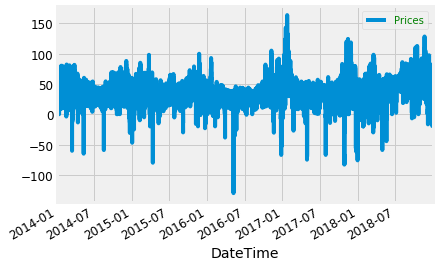

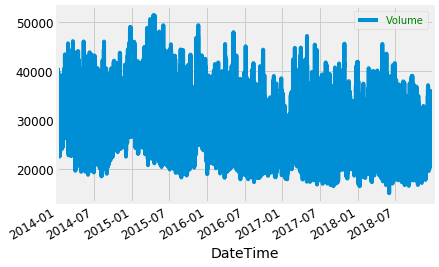

In [49]:
# Graphing historical data
db_series_prices.plot()
db_series_volume.plot()

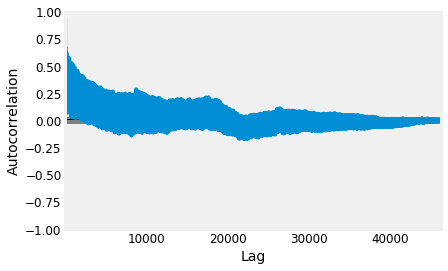

In [50]:
# Past errors are affecting future prices
autocorrelation_plot(db_series_prices)
plt.show()

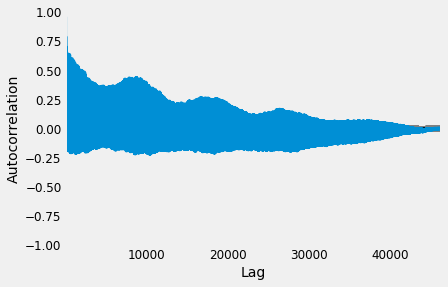

In [75]:
# Past errors are affecting future volume
autocorrelation_plot(db_series_volume)
plt.show()

In [51]:
# The time series is stacionary
result = adfuller(db_series_prices.Prices.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.832927
p-value: 0.000000


In [71]:
# The time series is stacionary
result = adfuller(db_series_volume.Volume.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.640162
p-value: 0.000000


In [52]:
# 1,1,1 ARIMA Model
model = ARIMA(db_series_prices.Prices, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Prices   No. Observations:                46175
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -138484.649
Method:                       css-mle   S.D. of innovations              4.856
Date:                Mon, 16 Dec 2019   AIC                         276977.298
Time:                        15:21:44   BIC                         277012.259
Sample:                             1   HQIC                        276988.290
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.458e-05      0.036      0.002      0.999      -0.071       0.071
ar.L1.D.Prices     0.3515      0.009     38.818      0.000       0.334       0.369
ma.L1.D.Prices     0.0389      0.009

In [72]:
# 1,1,1 ARIMA Model
model2 = ARIMA(db_series_volume.Volume, order=(1,1,1))
model_fit2 = model2.fit()
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.Volume   No. Observations:                46175
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -397912.812
Method:                       css-mle   S.D. of innovations           1337.493
Date:                Tue, 17 Dec 2019   AIC                         795833.624
Time:                        08:30:33   BIC                         795868.584
Sample:                             1   HQIC                        795844.616
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0802     14.530      0.006      0.996     -28.399      28.559
ar.L1.D.Volume     0.6053      0.006     99.615      0.000       0.593       0.617
ma.L1.D.Volume    -0.0787      0.007

In [203]:
# results = mod.fit()
forecast_price = model_fit.predict()
forecast_price.iloc[-5:-1]

DateTime
2018-12-31 19:00:00    606.763621
2018-12-31 20:00:00     12.790545
2018-12-31 21:00:00   -567.885241
2018-12-31 22:00:00    165.874598
dtype: float64

In [202]:
# results = mod.fit()
forecast_volume = model_fit2.predict()
forecast_volume.iloc[-5:-1]

DateTime
2018-12-31 19:00:00    279.132234
2018-12-31 20:00:00     -5.865310
2018-12-31 21:00:00   -275.026065
2018-12-31 22:00:00     90.946787
dtype: float64

***Eliminating negative values and eliminating the parameter of Integrated part:***

In [153]:
db_series_prices[db_series_prices['Prices'] < 0] = 0

In [154]:
db_series_prices = pd.DataFrame(db_series_prices)

In [156]:
db_series_prices[db_series_volume['Volume'] < 0] = 0

In [157]:
db_series_volume = pd.DataFrame(db_series_volume)

In [192]:
# AR= 24, d = 1, MA = 2 ARIMA Model
model3 = ARIMA(db_series_prices.Prices, order=(24,0,2))
model_fit3 = model3.fit()
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                46176
Model:                    ARMA(24, 2)   Log Likelihood             -125366.979
Method:                       css-mle   S.D. of innovations              3.654
Date:                Tue, 17 Dec 2019   AIC                         250789.957
Time:                        12:11:36   BIC                         251034.683
Sample:                             0   HQIC                        250866.901
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.3238      0.574     61.571      0.000      34.199      36.448
ar.L1.Prices      2.0674      0.010    198.335      0.000       2.047       2.088
ar.L2.Prices     -1.6332      0.020    -

In [194]:
# 1,1,1 ARIMA Model
model4 = ARIMA(db_series_volume.Volume, order=(24,0,2))
model_fit4 = model4.fit()
print(model_fit4.summary())

                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                46176
Model:                    ARMA(24, 2)   Log Likelihood             -388060.007
Method:                       css-mle   S.D. of innovations           1080.182
Date:                Tue, 17 Dec 2019   AIC                         776176.013
Time:                        12:48:46   BIC                         776420.740
Sample:                             0   HQIC                        776252.957
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.774e+04    195.469    141.896      0.000    2.74e+04    2.81e+04
ar.L1.Volume      2.1068      0.012    180.081      0.000       2.084       2.130
ar.L2.Volume     -1.7095      0.023    -

In [193]:
# results = mod.fit()
forecast_prices2 = model_fit3.predict()
forecast_prices2.iloc[-5:-1]

DateTime
2018-12-31 19:00:00    67.035963
2018-12-31 20:00:00    54.546952
2018-12-31 21:00:00    46.760507
2018-12-31 22:00:00    43.686335
dtype: float64

In [195]:
# results = mod.fit()
forecast_volume2 = model_fit4.predict()
forecast_volume2.iloc[-5:-1]

DateTime
2018-12-31 19:00:00    28032.659803
2018-12-31 20:00:00    26529.659819
2018-12-31 21:00:00    25788.059496
2018-12-31 22:00:00    26176.217481
dtype: float64

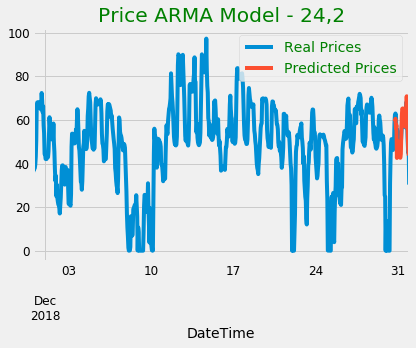

In [260]:
db_series_prices['2018-11-30':].plot()
forecast_prices2.iloc[-30:-1].plot()
plt.title('Price ARMA Model - 24,2')
plt.legend(['Real Prices','Predicted Prices'])
plt.show()

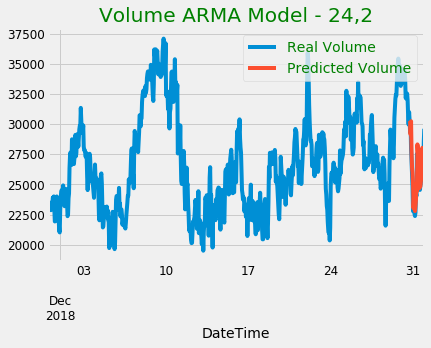

In [261]:
db_series_volume['2018-11-30':].plot()
forecast_volume2.iloc[-30:-1].plot()
plt.title('Volume ARMA Model - 24,2')
plt.legend(['Real Volume','Predicted Volume'])
plt.show()

In [251]:
# MAE - Prices Model
mae_p = mean_absolute_error(db_series_prices, forecast_prices2)
print('MAE: %f' % mae)

MAE: 794.619878


In [255]:
# Prices Model Performance
print('Price average: '+str(int(db_series_prices.mean())))
print('MAE: '+str(int(mae_p))) 
print('In average, there is a difference of '+str(int(mae_p/db_series_prices.mean()))+'%'+' between the real and predict numbers.')

Price average: 35
MAE: 2
In average, there is a difference of 0% between the real and predict numbers.


In [249]:
# MAE - Volume Model
mae_v = mean_absolute_error(db_series_volume, forecast_volume2)
print('MAE: %f' % mae)

MAE: 794.619878


In [254]:
# Volume Model Performance
print('Volume average: '+str(int(db_series_volume.mean())))
print('MAE: '+str(int(mae_v))) 
print('In average, there is a difference of '+str(int(mae_v/db_series_volume.mean()))+'%'+' between the real and predict numbers.')

Volume average: 27736
MAE: 794
In average, there is a difference of 0% between the real and predict numbers.


***Weather Data vs Prices Regression:***

In [344]:
db_w = pd.pivot_table(db, values = 'Prices', index = ['Year','Month'],aggfunc = ['mean'])

In [345]:
db_w2 = db_w.reset_index()

In [346]:
# Mean Prices by Month
db_w2.columns = ['Year','Month','Avg Prices']

In [347]:
# Import Weather Databases of Berlin
berlin = pd.read_csv('C:/Users/jpolancoroque/Desktop/Financial Programing/Individual/Weather Berlin.csv', sep=',')

In [348]:
berlin = pd.DataFrame(berlin)

In [366]:
result = db_w2.append(berlin, sort=False)

In [372]:
db_w2[["y", "m", "c"]] = berlin

In [373]:
db_w3 =  db_w2.drop(columns=['y','m','c'])

In [375]:
db_w3.head()

,Year,Month,Avg Prices,Celsius
0,2014,1,35.874395,0.97
1,2014,2,33.587068,5.66
2,2014,3,31.051090,8.10
3,2014,4,31.583083,12.23
4,2014,5,30.625591,13.91


In [378]:
# Modeling Price vs Hour
y2 = db_w3.iloc[:,[2]].values
X2 = db.iloc[:,[3]].values
scaler2 = StandardScaler()
X_scaled2 = scaler.fit_transform(X)
y_scaled2 = scaler.fit_transform(y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y_scaled2, test_size=0.3, random_state=15)

In [379]:
# There is a strong relationship Price-Weather. However, Price is not solely explained by Weather. 
OLS(y_train2,X_train2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.090
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              3183.
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                        0.00
Time:                        16:40:00   Log-Likelihood:                         -44136.
No. Observations:               32323   AIC:                                  8.827e+04
Df Residuals:                   32322   BIC:                                  8.828e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2995      0.005    -56.419      0.000      -0.310      -0.289
==============================================================================
Omnibus:                     1105.386   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.413
Skew:                           0.452   Prob(JB):                    1.29e-256
Kurtosis:                       2.758   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
model2 = OLS(y_train2,X_train2).fit()
model2.predict()

array([ 0.14802046, -0.40553862,  0.74504693, ..., -0.10145264,
       -0.50473343, -0.0901214 ])

## 4) Dashboard: 

***Daily Prices Graph:***

In [37]:
#output_file('index.html')

In [37]:
daily_price = figure(title='Day-Ahead-Auction Germnay', x_axis_label='Date',y_axis_label='Price by Hour')

In [38]:
daily_price.line(db.iloc[:,0],db.iloc[:,6],legend = 'Daily Price', line_width=2)

GlyphRenderer(id='1038', ...)

In [39]:
show(daily_price)

***Prices by Day of Week:***

In [40]:
# Group by new tables
dawning_by_year = db.groupby('Year').agg('mean')[['Dawning']].reset_index()
earlymorning_by_year = db.groupby('Year').agg('mean')[['Early Morning']].reset_index()
morning_by_year = db.groupby('Year').agg('mean')[['Morning']].reset_index()
schooltime_by_year = db.groupby('Year').agg('mean')[['School Time']].reset_index()
afternoon_by_year = db.groupby('Year').agg('mean')[['Afternoon']].reset_index()
businesstime_by_year = db.groupby('Year').agg('mean')[['Business Time']].reset_index()
noon_by_year = db.groupby('Year').agg('mean')[['Noon']].reset_index()
dayavg_by_year = db.groupby('Year').agg('mean')[['Day Avg']].reset_index()

In [41]:
# Table preparation for Bokeh
year = ['2014','2015','2016','2017','2018']
daw_p = list(dawning_by_year['Dawning'])
daw_em = list(earlymorning_by_year['Early Morning'])
daw_m = list(morning_by_year['Morning'])
daw_st = list(schooltime_by_year['School Time'])
daw_a = list(afternoon_by_year['Afternoon'])
daw_bt = list(businesstime_by_year['Business Time'])
daw_n = list(noon_by_year['Noon'])
daw_davg = list(dayavg_by_year['Day Avg'])

In [42]:
output_file("bars.html")

In [43]:
# Dawning - 0 to 5
dawning = figure(x_range=year, plot_height=250, title="Dawning Avg Price - 0 to 5")
dawning.vbar(x=year,top=daw_p,legend = 'Dawning Price', width=0.9)
dawning.xgrid.grid_line_color = None
dawning.y_range.start = 0

show(dawning)

In [44]:
# Early Morning - 4 to 11
early_morning = figure(x_range=year, plot_height=250, title="Early Morning Price - 4 to 11")
early_morning.vbar(x=year,top=daw_em,legend = 'Early Morning Price', width=0.9)
early_morning.xgrid.grid_line_color = None
early_morning.y_range.start = 0

show(early_morning)

In [45]:
# Morning - 6 to 9
morning = figure(x_range=year, plot_height=250, title="Morning Price - 6 to 9")
morning.vbar(x=year,top=daw_m,legend = 'Morning Price', width=0.9)
morning.xgrid.grid_line_color = None
morning.y_range.start = 0

show(morning)

In [46]:
# School Time - 0 to 7 and 20 to 23
school_time = figure(x_range=year, plot_height=250, title="School Time - 0 to 7 and 20 to 23")
school_time.vbar(x=year,top=daw_m,legend = 'School Time Price', width=0.9)
school_time.xgrid.grid_line_color = None
school_time.y_range.start = 0

show(school_time)

In [47]:
# Afternoon - 14 to 17 
afternoon = figure(x_range=year, plot_height=250, title="Afternoon - 14 to 17")
afternoon.vbar(x=year,top=daw_a,legend = 'Afternoon Price', width=0.9)
afternoon.xgrid.grid_line_color = None
afternoon.y_range.start = 0

show(afternoon)

In [48]:
# Business Time - 8 to 19 
bt = figure(x_range=year, plot_height=250, title="Business Time - 8 to 19")
bt.vbar(x=year,top=daw_bt,legend = 'Business Time Price', width=0.9)
bt.xgrid.grid_line_color = None
bt.y_range.start = 0

show(bt)

In [49]:
# Noon - 10 to 1
noon = figure(x_range=year, plot_height=250, title="Noon - 8 to 19")
noon.vbar(x=year,top=daw_n,legend = 'Noon Price', width=0.9)
noon.xgrid.grid_line_color = None
noon.y_range.start = 0

show(noon)

In [50]:
# Day Average
day_avg = figure(x_range=year, plot_height=250, title="Day Average")
day_avg.vbar(x=year,top=daw_davg,legend = 'Day Average Price', width=0.9)
day_avg.xgrid.grid_line_color = None
day_avg.y_range.start = 0

show(day_avg)

In [82]:
# Bokeh Dashboard - Showing hour catgories performance by year
#grid = gridplot([[dawning, early_morning], [afternoon, noon]], plot_width=250, plot_height=250)
#show(grid)

In [61]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.layouts import column


output_file('EPEXGermanyDashboard1.html', title='EPEX Germany Dashboard')

dawning1 = Panel(child=dawning, title='Dawning')
early_morning1 = Panel(child=early_morning, title='Early Morning')
morning1 = Panel(child=morning, title='Morning')
school_time1 = Panel(child=school_time, title='School Time')
afternoon1 = Panel(child=afternoon, title='Afternoon')
bt1 = Panel(child=bt,title='Business Time')
noon = Panel(child=noon,title='Noon')
day_avg =Panel(child=day_avg,title='Day Average')
#l1 = layout([[u_bulg,u_spa],[u_cro,u_ita],[u_por]], sizing_mode='fixed')

tabs = Tabs(tabs=[dawning1, early_morning1, school_time1, afternoon1, bt1,noon,day_avg])

show(tabs)

ValueError: expected an instance of type LayoutDOM, got Panel(id='2081', ...) of type Panel

Created by ***Jorge Polanco Roque***